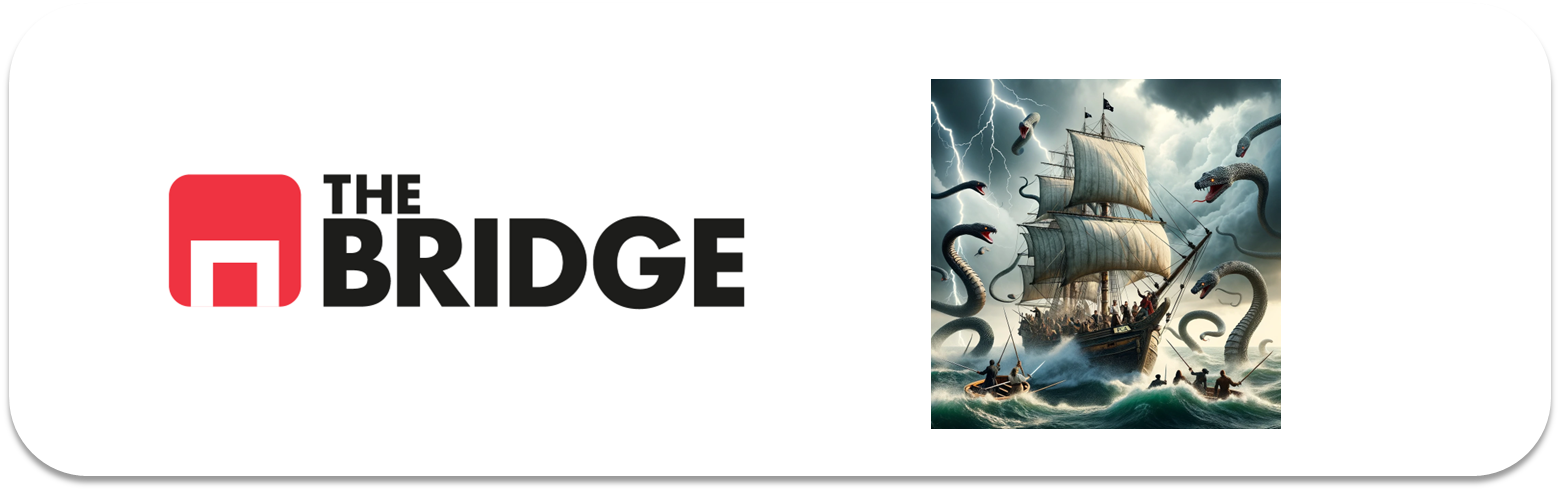

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [2]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif

#import warnings library
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')

### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


### 1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

In [5]:
df = pd.read_csv("data/credit_npo.csv")
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [11]:
#eliminar las filas con nulos
df = df.dropna(axis=0)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11816 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64
 2   age                                   11816 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  11816 non-null  int64  
 4   DebtRatio                             11816 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       11816 non-null  int64  
 7   NumberOfTimes90DaysLate               11816 non-null  int64  
 8   NumberRealEstateLoansOrLines          11816 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  11816 non-null  int64  
 10  NumberOfDependents                    11816 non-null  float64
dtypes: float64(4), int64

In [13]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [22]:
target ="SeriousDlqin2yrs"

In [23]:
train_set, test_set = train_test_split(df, test_size=0.3, random_state= 42)

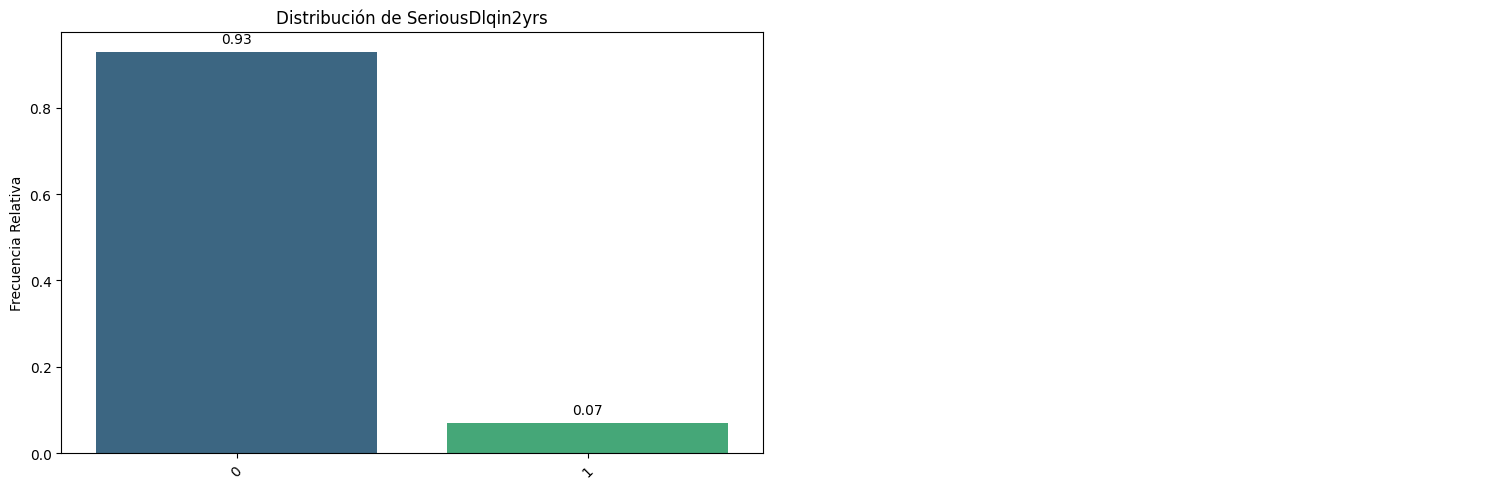

In [25]:
bt.pinta_distribucion_categoricas(train_set,[target], mostrar_valores = True, relativa = True)

In [34]:
from sklearn.preprocessing import MinMaxScaler

features_to_scale = [col for col in train_set.columns if 'NumberOf' in col]

subset_train_set = train_set[features_to_scale].copy()
subset_train_set.dropna(inplace=True)

subset_train_set = subset_train_set.apply(pd.to_numeric, errors='coerce')

subset_train_set.dropna(inplace=True)



scaler = MinMaxScaler()

# Aplica el escalado 
subset_train_set_scaled = scaler.fit_transform(subset_train_set)


subset_train_set_scaled_df = pd.DataFrame(subset_train_set_scaled, columns=features_to_scale)

# Aplica cut para convertir en categorías con 3 niveles
num_bins = 3
for feature in features_to_scale:
    subset_train_set_scaled_df[feature] = pd.cut(subset_train_set_scaled_df[feature], bins=num_bins, labels=False)



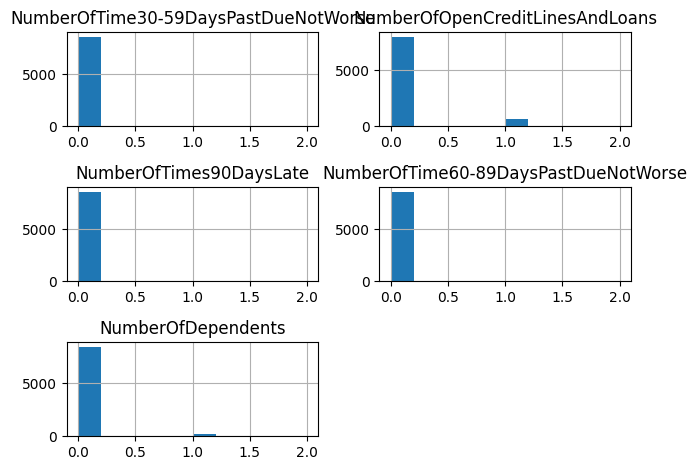

In [33]:
subset_train_set_scaled_df.hist()
plt.tight_layout()
plt.show()


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   SeriousDlqin2yrs                      12537 non-null  int64   
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64 
 2   age                                   12537 non-null  int64   
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64   
 4   DebtRatio                             12537 non-null  float64 
 5   MonthlyIncome                         11816 non-null  float64 
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64   
 7   NumberOfTimes90DaysLate               12537 non-null  int64   
 8   NumberRealEstateLoansOrLines          12537 non-null  int64   
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64   
 10  NumberOfDependents                    12360 non-null  float64 
 11  Op

###  1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.

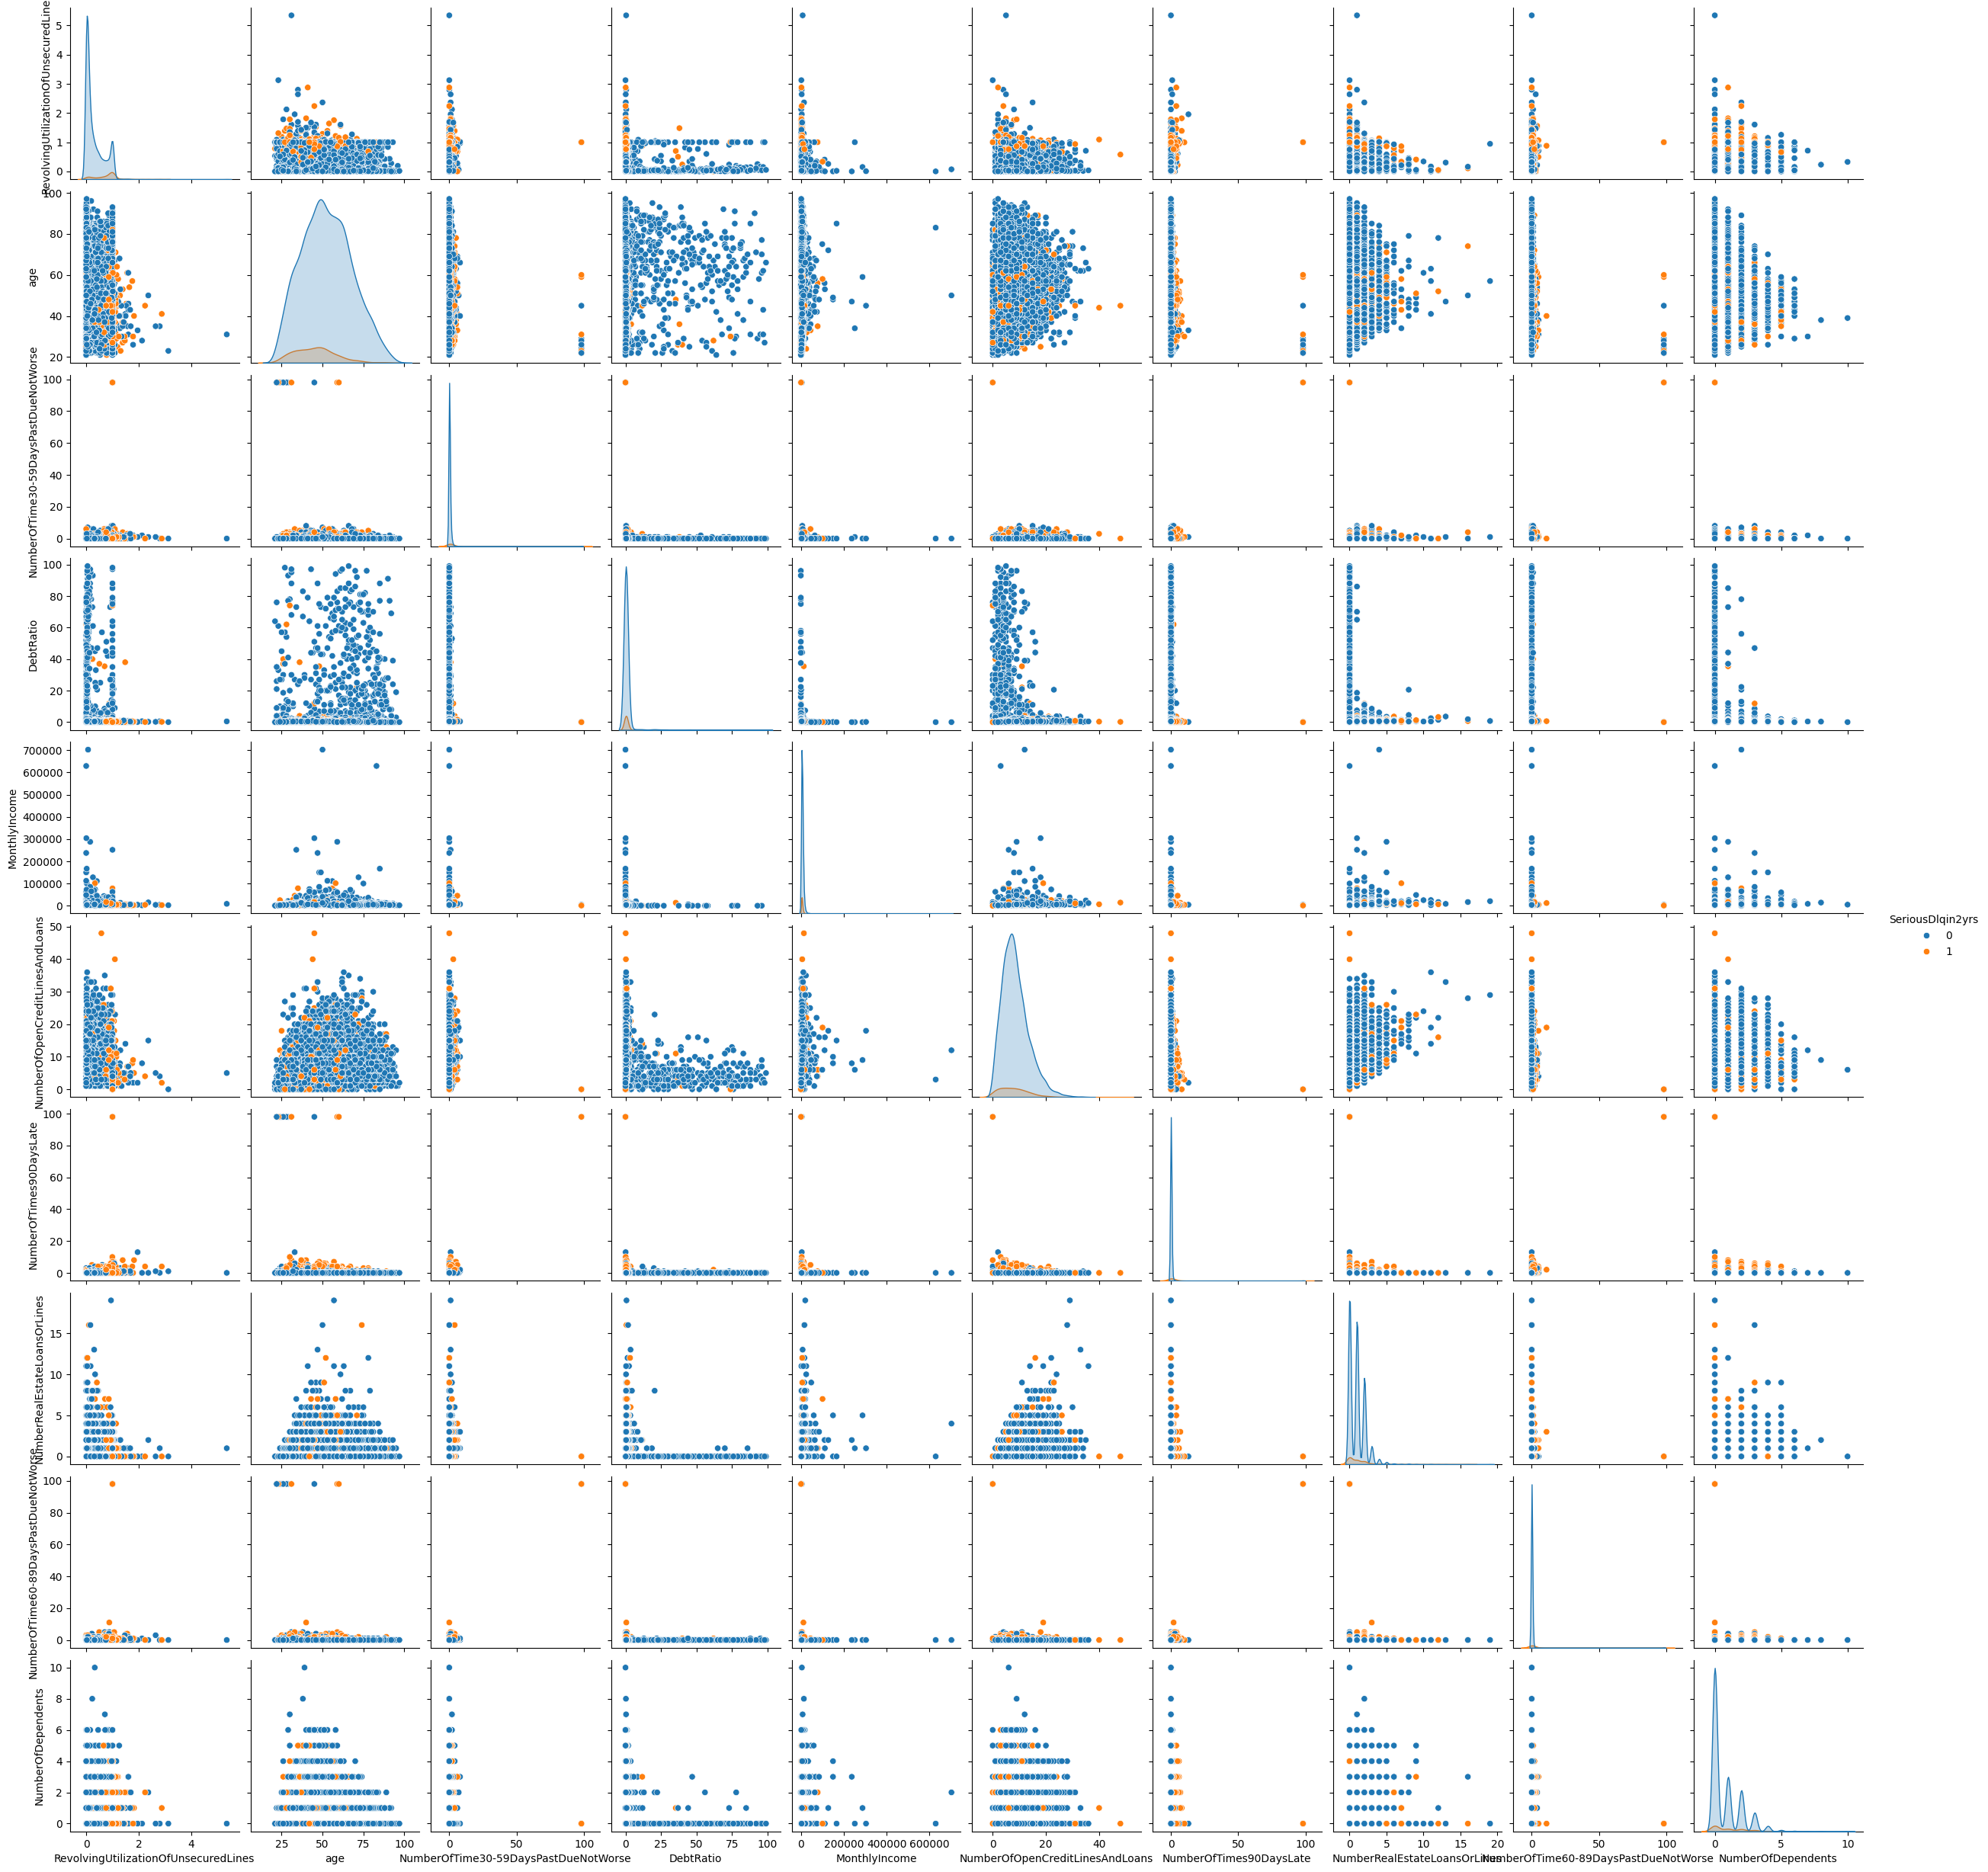

In [37]:
sns.pairplot(train_set, hue = target)

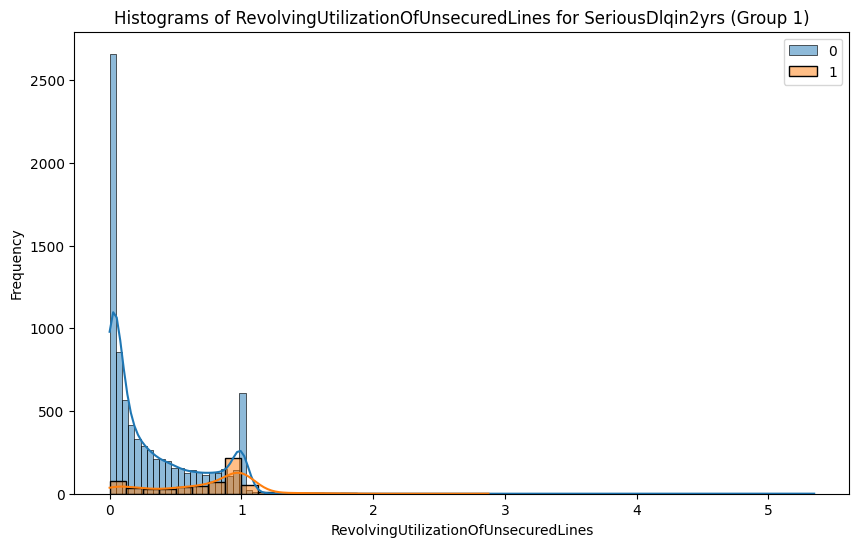

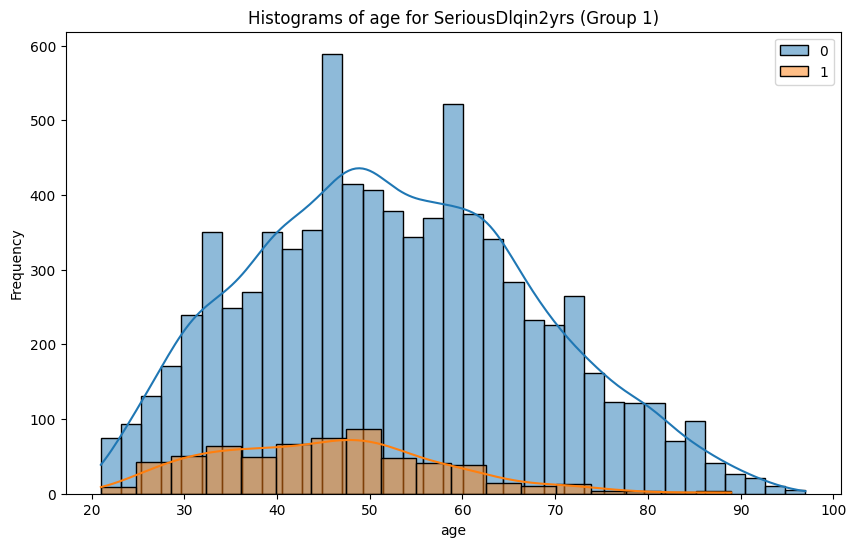

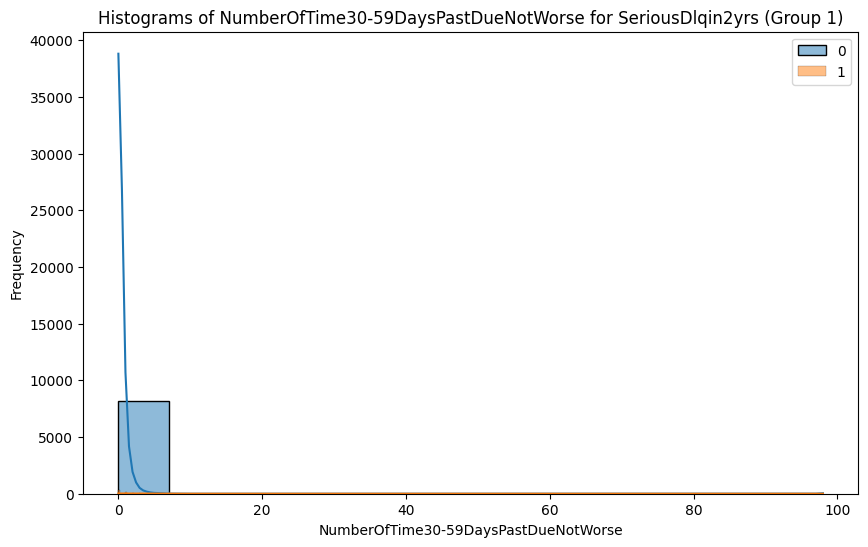

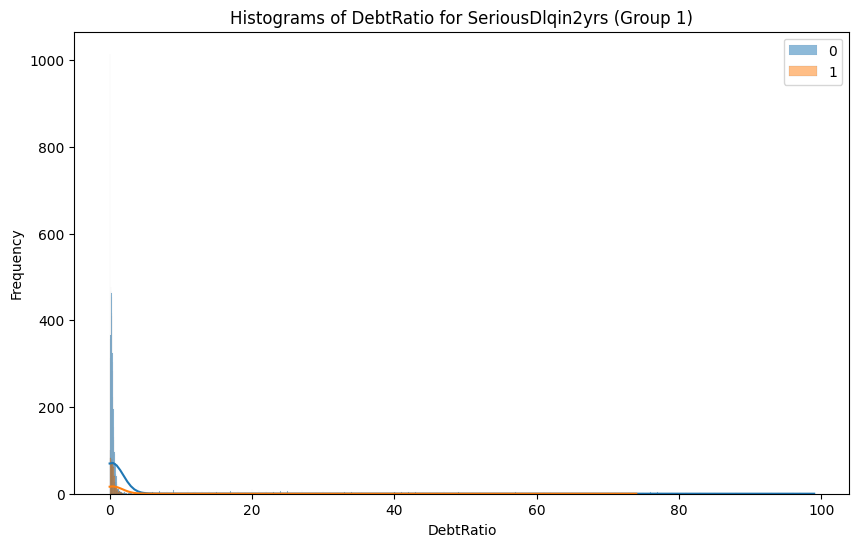

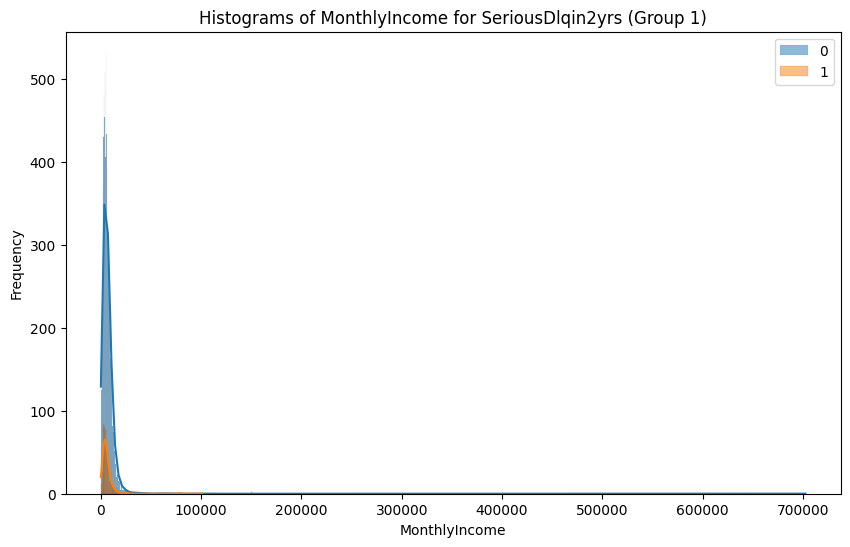

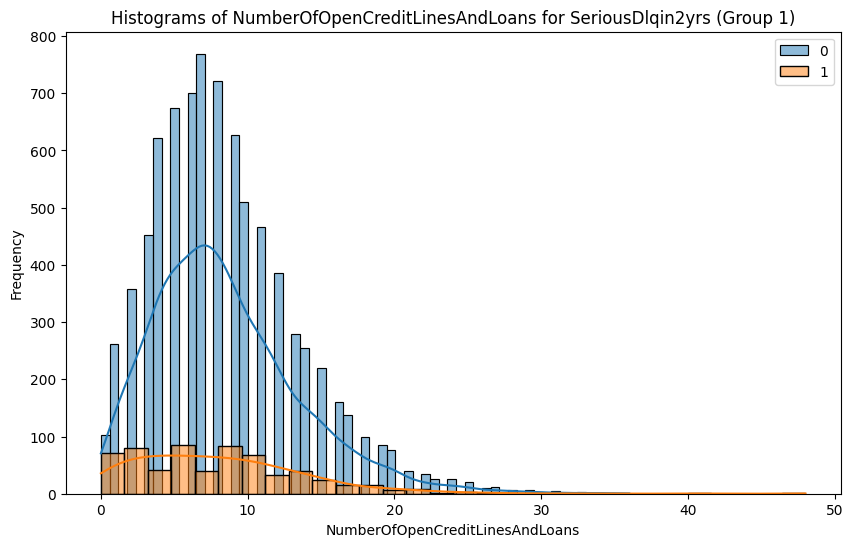

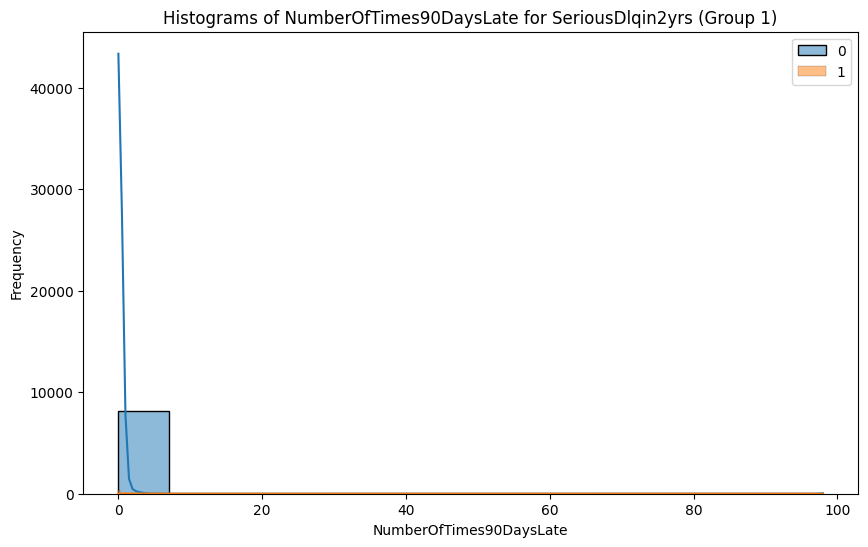

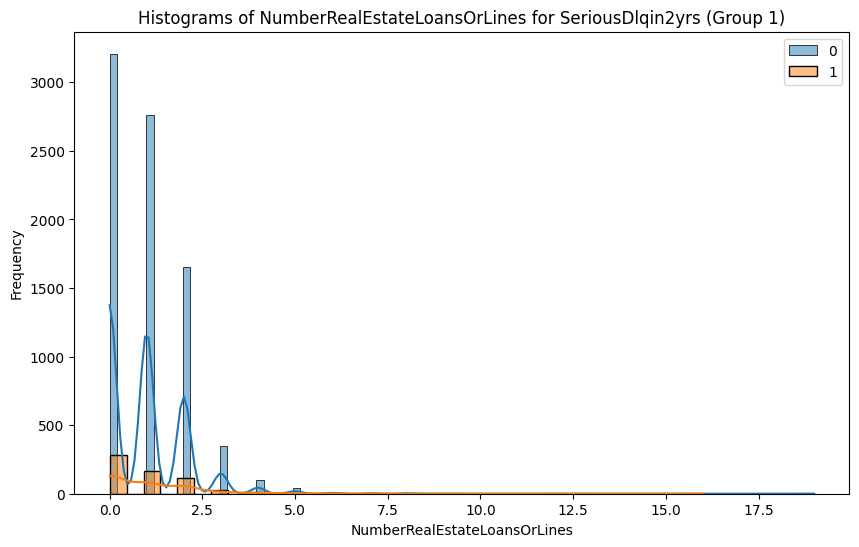

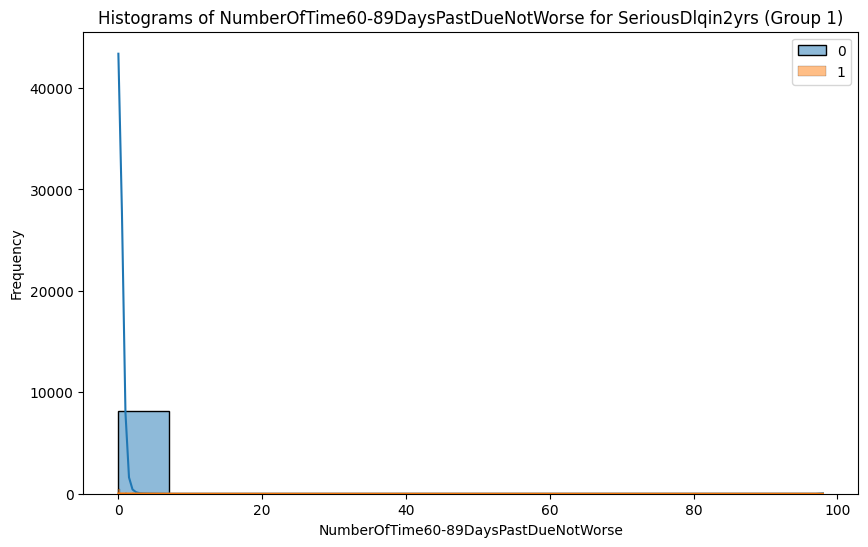

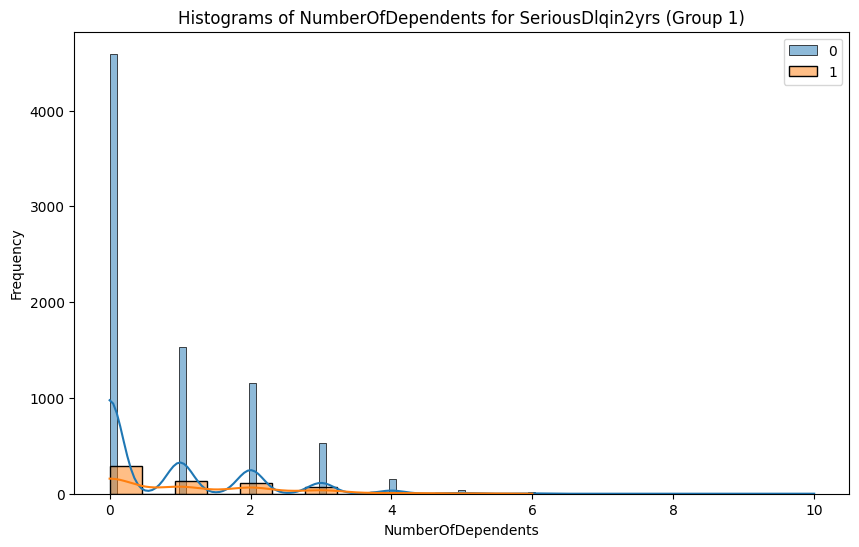

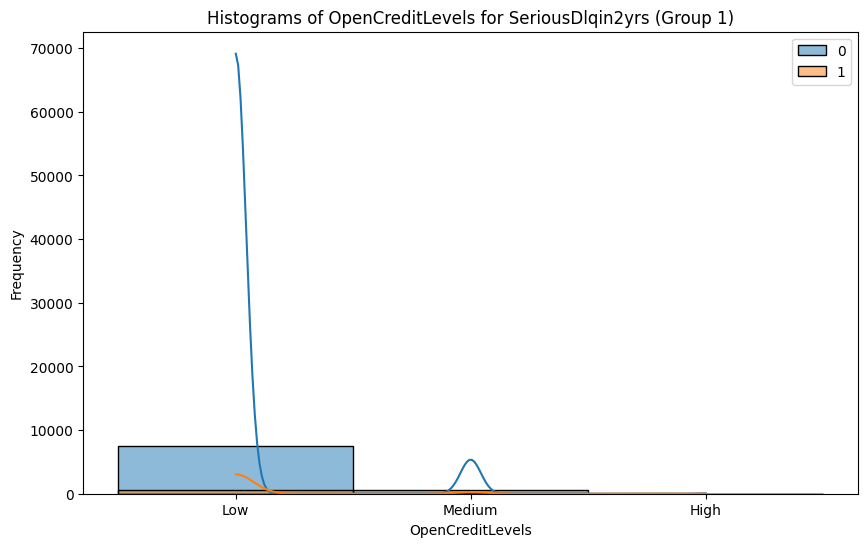

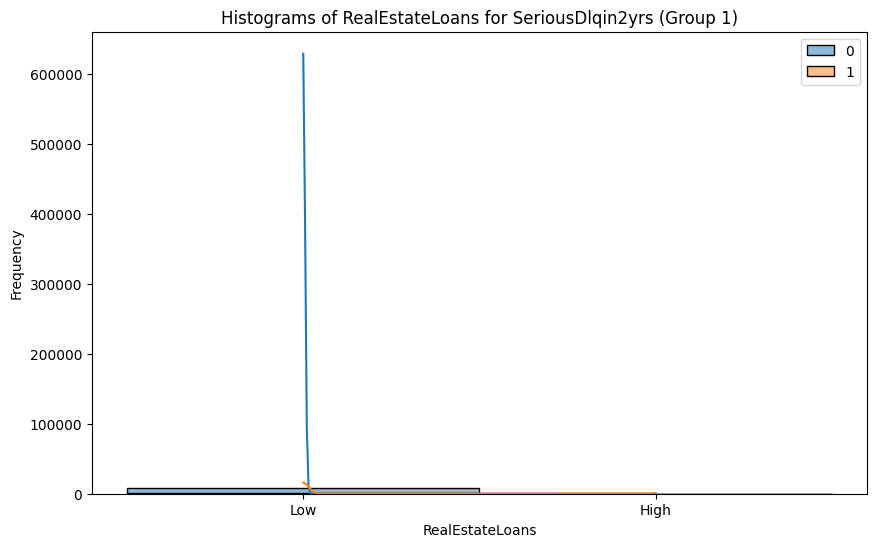

In [36]:
for col in train_set.columns:
    if col!= target:
        bt.plot_grouped_histograms(train_set, target, col, group_size = 2)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   SeriousDlqin2yrs                      12537 non-null  int64   
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64 
 2   age                                   12537 non-null  int64   
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64   
 4   DebtRatio                             12537 non-null  float64 
 5   MonthlyIncome                         11816 non-null  float64 
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64   
 7   NumberOfTimes90DaysLate               12537 non-null  int64   
 8   NumberRealEstateLoansOrLines          12537 non-null  int64   
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64   
 10  NumberOfDependents                    12360 non-null  float64 
 11  Op

In [50]:

num_col = df.select_dtypes(include=['float64', 'int64'])
cat_col = df.select_dtypes(include=['category'])


In [56]:
 target  ='SeriousDlqin2yrs '

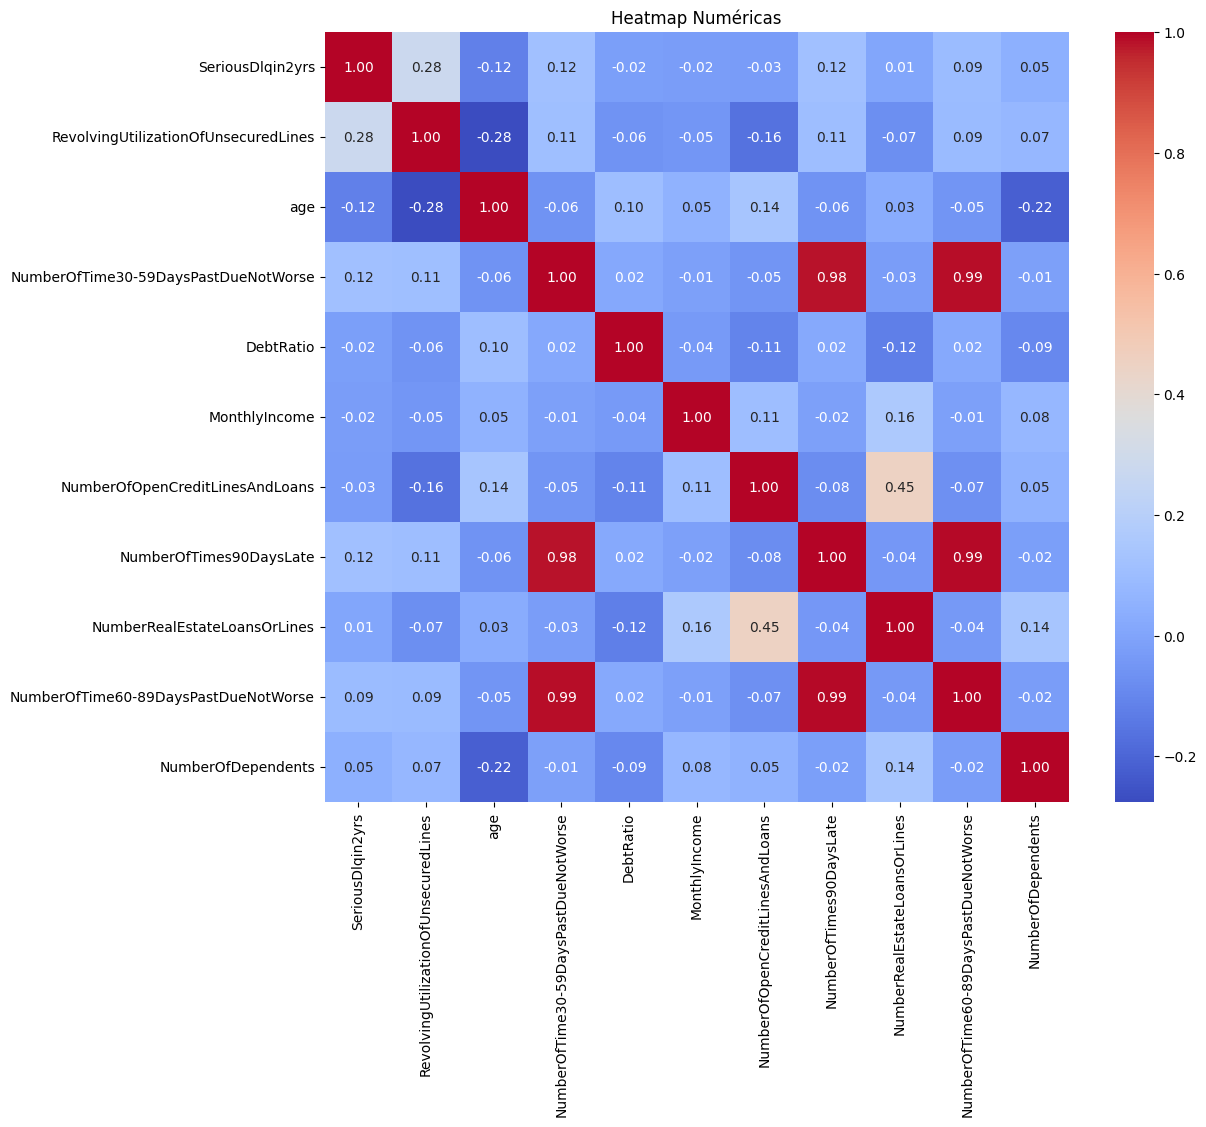

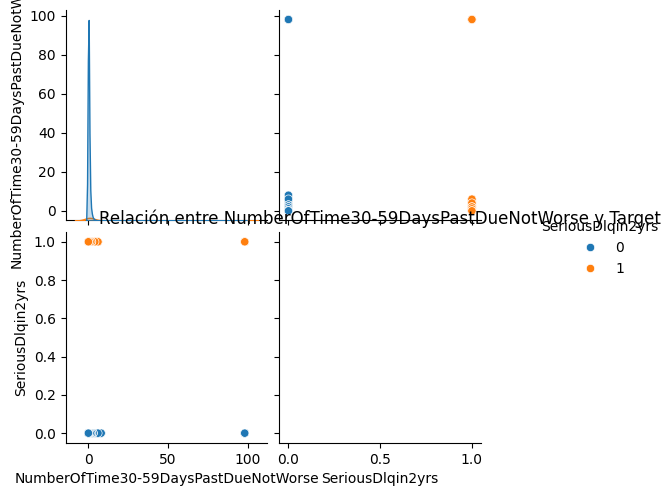

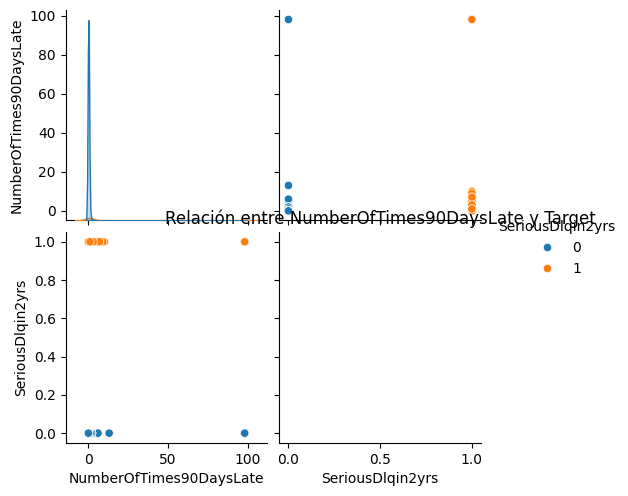

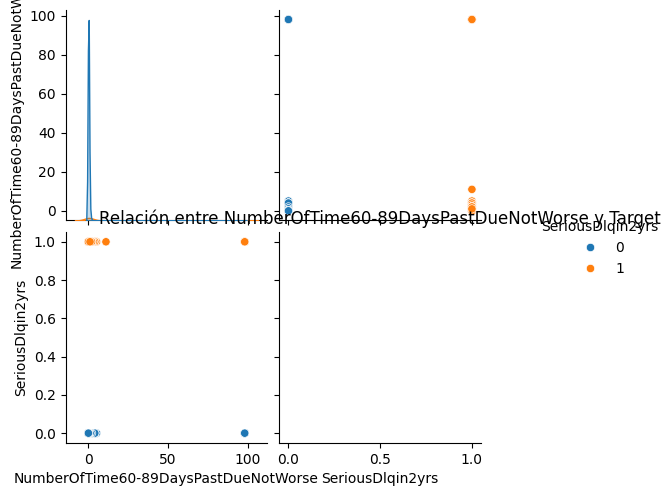

In [62]:


correlation_matrix = num_col.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Numéricas')
plt.show()

# Filtrado por valores de correlación
threshold_corr = 0.6  # Establece el umbral de correlación
high_corr_pairs = (correlation_matrix.abs() > threshold_corr) & (correlation_matrix.abs() < 1.0)
high_corr_cols = [col for col in high_corr_pairs.columns if any(high_corr_pairs[col])]

#  columnas altamente correlacionadas
for col in high_corr_cols:
    sns.pairplot(data=df, hue='SeriousDlqin2yrs', vars=[col, 'SeriousDlqin2yrs'])
    plt.title(f'Relación entre {col} y Target')
    plt.show()

# Filtrado por umbral de covarianza 
threshold_covariance = 10000
high_covariance_cols = [col for col in num_col.columns if num_col[col].cov(df['SeriousDlqin2yrs']) > threshold_covariance]

# alta covarianza
for col in high_covariance_cols:
    sns.pairplot(data=df, hue='SeriousDlqin2yrs', vars=[col, 'SeriousDlqin2yrs'])
    plt.title(f'Relación entre {col} y Target')
    plt.show()


  ## 2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 

In [70]:
from scipy import stats
from sklearn.feature_selection import SelectKBest, f_classif

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   SeriousDlqin2yrs                      12537 non-null  int64   
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64 
 2   age                                   12537 non-null  int64   
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64   
 4   DebtRatio                             12537 non-null  float64 
 5   MonthlyIncome                         11816 non-null  float64 
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64   
 7   NumberOfTimes90DaysLate               12537 non-null  int64   
 8   NumberRealEstateLoansOrLines          12537 non-null  int64   
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64   
 10  NumberOfDependents                    12360 non-null  float64 
 11  Op

In [68]:
num_features = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans']
cat_features = ['OpenCreditLevels', 'RealEstateLoans']


In [81]:
df = df.dropna(subset=['MonthlyIncome']) #me daba nulos todavía

In [86]:




#ANOVA 
for feature in num_features:
    f_val, p_val = stats.f_oneway(*[df[df[target] == target_value][feature] for target_value in df[target].unique()])
    print(f"Variable: {feature}")
    print("Valor F:", f_val)
    print("Valor p:", p_val)
    print("\n")

#  SelectKBest
X_train = df[num_features]
y_train = df[target]

selector = SelectKBest(f_classif, k=5)
x_data_kbest = selector.fit_transform(X_train, y_train)
X_train_kbest = pd.DataFrame(x_data_kbest, columns=selector.get_feature_names_out())


print("Características seleccionadas:")
print(X_train_kbest.head())



Variable: RevolvingUtilizationOfUnsecuredLines
Valor F: 1007.7408239980393
Valor p: 2.652100176209838e-212


Variable: age
Valor F: 134.44653571156564
Valor p: 6.413858414625236e-31


Variable: DebtRatio
Valor F: 0.03279818515706709
Valor p: 0.856290078074966


Variable: MonthlyIncome
Valor F: 5.824786023093839
Valor p: 0.015817006943526946


Variable: NumberOfOpenCreditLinesAndLoans
Valor F: 10.34176348190794
Valor p: 0.0013040373928390966


Características seleccionadas:
   RevolvingUtilizationOfUnsecuredLines   age  DebtRatio  MonthlyIncome  \
0                              0.081892  37.0   0.070709         5656.0   
1                              0.023413  74.0   0.209197         4870.0   
2                              0.000000  43.0   0.080784         5000.0   
3                              0.492754  44.0   0.412735         7333.0   
4                              1.000000  63.0   0.000000         8333.0   

   NumberOfOpenCreditLinesAndLoans  
0                             12.0

### 3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
lr_selector = LogisticRegression(max_iter = 1000)
rf_selector = RandomForestClassifier(random_state= 42)

In [89]:
rf_selector.fit(df[num_features],df[target])

RandomForestClassifier(random_state=42)

In [90]:
rf_selector.feature_importances_[rf_selector.feature_importances_ > rf_selector.feature_importances_.mean()]

array([0.28824863, 0.22365722, 0.22051013])

In [92]:
selector_model = SelectFromModel(estimator = rf_selector, threshold= "median") 

In [94]:
selector_model.fit(df[num_features],df[target]) 

SelectFromModel(estimator=RandomForestClassifier(random_state=42),
                threshold='median')

In [95]:
selector_model.get_feature_names_out()

array(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio',
       'MonthlyIncome'], dtype=object)

In [96]:
X_train_model = pd.DataFrame(selector_model.transform(df[num_features]), columns = selector_model.get_feature_names_out())
X_train_model

,RevolvingUtilizationOfUnsecuredLines,DebtRatio,MonthlyIncome
0,0.081892,0.070709,5656.0
1,0.023413,0.209197,4870.0
2,0.000000,0.080784,5000.0
3,0.492754,0.412735,7333.0
4,1.000000,0.000000,8333.0
...,...,...,...
11811,0.197116,0.290216,5140.0
11812,0.036726,0.884985,5833.0
11813,0.120313,0.577676,6333.0
11814,0.252566,0.037640,14000.0


### 4. Selección de las mejores features empleando RFE.

In [98]:
from sklearn.feature_selection import RFE

X_train_rfe = df[num_features].copy()
y_train_rfe = df[target]

In [103]:
rf_RFE = RandomForestClassifier(random_state= 42) # Puedes usar tu modelo, o modelos a probar o un modelo "proxy" como en la selección por modelo

rfe = RFE(estimator = rf_RFE,
          n_features_to_select= 5,
          step = 1) 

rfe.fit(X_train_rfe, y_train_rfe)
print(rfe.ranking_)
pd.DataFrame(rfe.ranking_, columns= ["ranking"], index = num_features).sort_values("ranking")

[1 1 1 1 1]


,ranking
RevolvingUtilizationOfUnsecuredLines,1
age,1
DebtRatio,1
MonthlyIncome,1
NumberOfOpenCreditLinesAndLoans,1


In [104]:
print("Seleccionadas por modelo:", list(selector_model.get_feature_names_out()))

Seleccionadas por modelo: ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome']


In [105]:
print("Seleccionadas por ANOVA:", X_train_kbest.columns.to_list())

Seleccionadas por ANOVA: ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans']


Era por la curiosidad de loo que dimos en clase, a ver de donde las ha sacado :)

In [107]:
rfe.transform(X_train_rfe)

array([[8.18915800e-02, 3.70000000e+01, 7.07088560e-02, 5.65600000e+03,
        1.20000000e+01],
       [2.34130030e-02, 7.40000000e+01, 2.09197290e-01, 4.87000000e+03,
        9.00000000e+00],
       [0.00000000e+00, 4.30000000e+01, 8.07838430e-02, 5.00000000e+03,
        2.00000000e+00],
       ...,
       [1.20313281e-01, 4.90000000e+01, 5.77676034e-01, 6.33300000e+03,
        7.00000000e+00],
       [2.52566432e-01, 6.30000000e+01, 3.76401690e-02, 1.40000000e+04,
        9.00000000e+00],
       [0.00000000e+00, 4.00000000e+01, 4.55357143e-01, 3.58300000e+03,
        7.00000000e+00]])

In [108]:
X_train_rfe_sol = pd.DataFrame(rfe.transform(X_train_rfe), columns = rfe.get_feature_names_out())
X_train_rfe_sol

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans
0,0.081892,37.0,0.070709,5656.0,12.0
1,0.023413,74.0,0.209197,4870.0,9.0
2,0.000000,43.0,0.080784,5000.0,2.0
3,0.492754,44.0,0.412735,7333.0,4.0
4,1.000000,63.0,0.000000,8333.0,3.0
...,...,...,...,...,...
11811,0.197116,59.0,0.290216,5140.0,6.0
11812,0.036726,62.0,0.884985,5833.0,12.0
11813,0.120313,49.0,0.577676,6333.0,7.0
11814,0.252566,63.0,0.037640,14000.0,9.0


### 5. Selección de las mejores features empleando SFS.

In [112]:
from sklearn.feature_selection import SequentialFeatureSelector

rf_SFS = RandomForestClassifier(random_state = 42)

sfs_forward = SequentialFeatureSelector(rf_SFS,
                                        n_features_to_select = 4,
                                        cv = 4,
                                        scoring = "balanced_accuracy")


sfs_forward.fit(X_train_rfe, y_train_rfe)


SequentialFeatureSelector(cv=4,
                          estimator=RandomForestClassifier(random_state=42),
                          n_features_to_select=4, scoring='balanced_accuracy')

In [113]:
print("Elegidasd SFS:", sfs_forward.get_feature_names_out())

Elegidasd SFS: ['RevolvingUtilizationOfUnsecuredLines' 'DebtRatio' 'MonthlyIncome'
 'NumberOfOpenCreditLinesAndLoans']


 ### 6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.
 

   ### Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

In [115]:
from collections import Counter

In [ ]:
from sklearn.feature_selection import RFE

# Inicializar modelos de Random Forest con diferentes hiperparámetros
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model2 = RandomForestClassifier(n_estimators=200, random_state=42)
model3 = RandomForestClassifier(n_estimators=300, random_state=42)

# Inicializar el modelo de RFE con Random Forest como estimador base
rf_rfe = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=rf_rfe, n_features_to_select=6)

# Definir las seis listas de características
features_step1 = [...]  # Características del paso 1
features_step2 = [...]  # Características del paso 2
features_step3 = [...]  # Características del paso 3
features_step4 = [...]  # Características del paso 4
features_step5 = [...]  # Características del paso 5
features_step6 = rfe.fit(X, y).support_  # Características del paso 6 utilizando RFE

# Crear una lista de listas con las características para cada modelo
feature_lists = [features_step1, features_step2, features_step3, features_step4, features_step5, features_step6]

# Inicializar variables para almacenar los resultados
best_model = None
best_features = None
best_accuracy = 0.0  # Inicializar con un valor bajo

# Definir una métrica para evaluar los modelos
def evaluate_model(model, X, y):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    return scores.mean()

# Iterar sobre los modelos y las listas de características
for model in [model1, model2, model3]:
    for feature_list in feature_lists:
        # Seleccionar las características correspondientes
        X_selected = X[feature_list]  # Asegúrate de tener X definido adecuadamente

        # Evaluar el modelo con validación cruzada
        accuracy = evaluate_model(model, X_selected, y)  # Asegúrate de tener y definido adecuadamente

        # Actualizar el mejor modelo y características si se encuentra una mejora
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model
            best_features = feature_list

# Imprimir los resultados
print("Mejor modelo:", best_model)
print("Mejor selección de características:", best_features)
print("Mejor precisión promedio:", best_accuracy)

### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.